In [2]:
import cv2
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt
from IPython.display import clear_output 
import time

/home/leadawon5/dawon/visionvenv/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# RLE 디코딩 함수
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

# RLE 인코딩 함수
def rle_encode(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [4]:
transform = A.Compose(
    [   
        A.Resize(224, 224),
        A.Normalize(),
        ToTensorV2()
    ]
)

In [5]:
class SatelliteDataset(Dataset):
    def __init__(self, csv_file, transform=None, infer=False):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.infer = infer
        print("full dataset size : ",len(self.data))
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        #img_path = self.data.iloc[idx, 1]    # default : ./train_img/TRAIN_0000.png
        img_path = "../data"+self.data.iloc[idx, 1][1:]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if self.infer:
            if self.transform:
                image = self.transform(image=image)['image']
            return image

        mask_rle = self.data.iloc[idx, 2]
        mask = rle_decode(mask_rle, (image.shape[0], image.shape[1]))

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        return image, mask
    
class TV_SatelliteDataset(Dataset):
    def __init__(self, csv_file, transform=None, is_train = True, TVcutter = int(7140 * 0.9)):
        self.is_train = is_train
        if self.is_train:
            self.data = pd.read_csv(csv_file)[:TVcutter]
        else:
            self.data = pd.read_csv(csv_file)[TVcutter:]
        self.transform = transform
        print("full dataset size : ",len(self.data))
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        #img_path = self.data.iloc[idx, 1]    # default : ./train_img/TRAIN_0000.png
        img_path = "../data"+self.data.iloc[idx, 1][1:]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
     

        mask_rle = self.data.iloc[idx, 2]
        mask = rle_decode(mask_rle, (image.shape[0], image.shape[1]))

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        return image, mask

wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow
wow


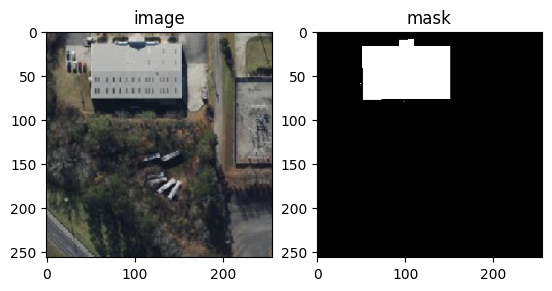

256
256
3


In [29]:
search_idx = 0
traindata = cv2.imread('../split_data/train_img/0_1.png')
image = cv2.cvtColor(traindata , cv2.COLOR_BGR2RGB)
traindata = cv2.imread('../split_data/train_mask/0_1.png')
mask = cv2.cvtColor(traindata , cv2.COLOR_BGR2RGB)

for i in mask:
    for j,v in enumerate(i):
        if v.all() == 1:
            i[j] = 255
            print("wow")

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("image")
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("mask")
plt.show()
print(len(mask))
print(len(mask[0]))
print(len(mask[0][0]))

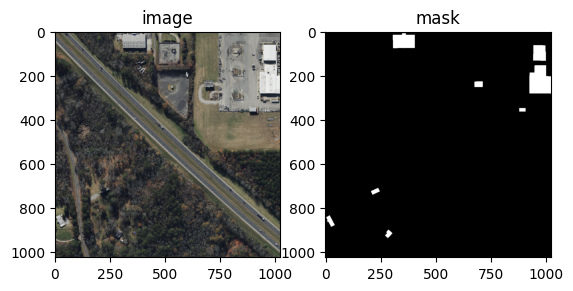

1024
1024


TypeError: object of type 'numpy.uint8' has no len()

In [28]:
search_idx = 0
traindata = pd.read_csv('../data/train.csv')
img_path = "../data"+traindata.iloc[search_idx, 1][1:]
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask_rle = traindata.iloc[search_idx, 2]
mask = rle_decode(mask_rle, (image.shape[0], image.shape[1]))

# 이거는 원시이미지
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("image")
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("mask")
plt.show()
print(len(mask))
print(len(mask[0]))
print(len(mask[0][0]))

In [31]:
search_idx = 0
traindata = pd.read_csv('../data/test.csv')
img_path = "../data"+traindata.iloc[search_idx, 1][1:]
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

traindata = pd.read_csv('../submit/submit_UNETbbresnet34imagenet.csv')
mask_rle = traindata.iloc[search_idx, 1]
mask = rle_decode(mask_rle, (image.shape[0], image.shape[1]))

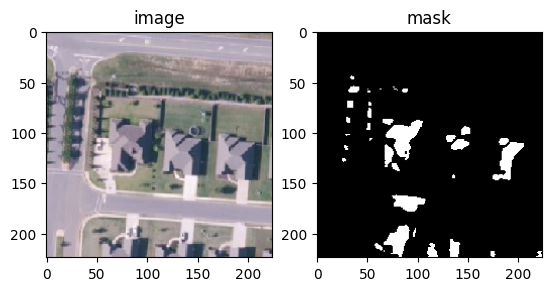

224 224 224 224


In [32]:
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("image")
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("mask")
plt.show()
print(len(image),len(image[0]), len(mask), len(mask[0]))

In [33]:
def printtest(search_idx=0, csvpath = '../submit/submit_UNETwithBN512size.csv'):
    clear_output()
    traindata = pd.read_csv('../data/test.csv')
    img_path = "../data"+traindata.iloc[search_idx, 1][1:]
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    

    
    traindata = pd.read_csv(csvpath)
    mask_rle = traindata.iloc[search_idx, 1]
    mask = rle_decode(mask_rle, (image.shape[0], image.shape[1]))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("image")
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("mask")
    plt.show()
    print(len(image),len(image[0]), len(mask), len(mask[0]))
    time.sleep(1)
    


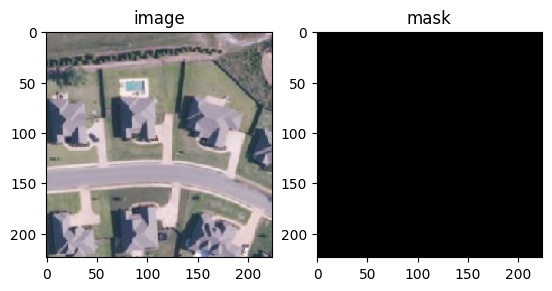

224 224 224 224


In [34]:
for i in range(10):
    printtest(search_idx=i, csvpath = '../submit/submit_UNETwithBN512size.csv')
    time.sleep(1)

In [38]:
train_dataset = TV_SatelliteDataset(csv_file='../data/train.csv', transform=transform, is_train=True)
val_dataset = TV_SatelliteDataset(csv_file='../data/train.csv', transform=transform, is_train=False)
test_dataset = SatelliteDataset(csv_file='../data/test.csv', transform=transform, infer=True)

full dataset size :  6426
full dataset size :  714
full dataset size :  60640


In [53]:
def printdataset(dataset,idx = 0):
    clear_output()
    sample = dataset[idx]
    image, mask = sample
    print(type(image))
# 이미지와 마스크 시각화
    plt.subplot(1, 2, 1)
    image = image.permute(1, 2, 0)
    plt.imshow(image)
    plt.title("image")
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("mask")
    plt.show()
    #print(len(image),len(image[0]), len(mask), len(mask[0]))
    time.sleep(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'>


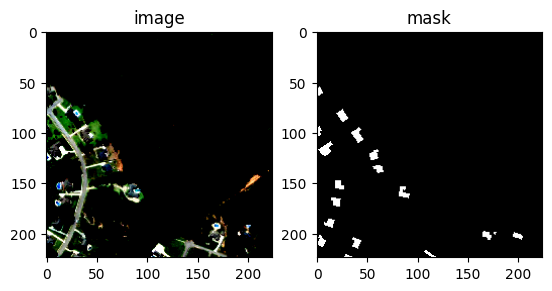

In [56]:
for i in range(6400,6400+20):
    printdataset(train_dataset, i)